# **Классификация с помощью логистической регрессии**

**Выполнил студент ФИО**

# 1.Выберете набор данных для Классификации

Выполните импорт данных. Оцените типы имеющихся данных, проверьте наличие дубликатов и/или пропущенных значений.

* Import библиотек

In [1]:
import pandas as pd # Библиотека Pandas для работы с табличными данными
import numpy as np # библиотека Numpy для операций линейной алгебры и прочего
import matplotlib.pyplot as plt # библиотека MatPlotLib для визуализации
import seaborn as sns; sns.set() # библиотека Seaborn для визуализации данных из Pandas

from sklearn.model_selection import train_test_split #  функция разбиения на тренировочную и тестовую выборку
# но в исполнении scikit-learn
from sklearn.impute import SimpleImputer # Объект для замены пропущенных значений
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler # Импортируем нормализацию и One-Hot Encoding от scikit-learn
from sklearn import preprocessing as prep  # общий модуль предварительной обработки scikit-learn
from sklearn import set_config # для доп настроек

from sklearn.pipeline import Pipeline # Pipeline - суперпомощник автоматизации обработки данных
from sklearn.compose import ColumnTransformer # т.н. преобразователь колонок

from sklearn.model_selection import cross_validate # функция кросс-валидации от Scikit-learn

from sklearn.model_selection import ShuffleSplit # при кросс-валидации случайно перемешиваем данные

from sklearn.metrics import mean_squared_error as mse # метрика MSE от Scikit-learn
from sklearn.metrics import r2_score # коэффициент детерминации  от Scikit-learn


from sklearn.metrics import r2_score, f1_score, mean_squared_error, mean_absolute_error, accuracy_score, recall_score, precision_score, confusion_matrix
from sklearn.linear_model import LogisticRegression # Логистичекая регрессия от scikit-learn
from sklearn.preprocessing import PolynomialFeatures # Объект для генерации полиномиальных признаков от scikit-learn

RANDOM_STATE = 42
import warnings
warnings.filterwarnings('ignore')

* Загрузка и считывание датасета

Ссылка на датасет - https://www.kaggle.com/datasets/alexandrududa/cars-moldova

In [2]:
df = pd.read_csv("cars.csv", delimiter = ',')
df

,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro)
0,Toyota,Prius,2011,Hatchback,195000.0,1800.0,Hybrid,Automatic,7750.0
1,Renault,Grand Scenic,2014,Universal,135000.0,1500.0,Diesel,Manual,8550.0
2,Volkswagen,Golf,1998,Hatchback,1.0,1400.0,Petrol,Manual,2200.0
3,Renault,Laguna,2012,Universal,110000.0,1500.0,Diesel,Manual,6550.0
4,Opel,Astra,2006,Universal,200000.0,1600.0,Metan/Propan,Manual,4100.0
...,...,...,...,...,...,...,...,...,...
41002,Dacia,Logan Mcv,2015,Universal,89000.0,1500.0,Diesel,Manual,7000.0
41003,Renault,Modus,2009,Hatchback,225.0,1500.0,Diesel,Manual,4500.0
41004,Mercedes,E Class,2016,Sedan,50000.0,1950.0,Diesel,Automatic,29500.0
41005,Mazda,6,2006,Combi,370000.0,2000.0,Diesel,Manual,4000.0


In [3]:
df.info() # информация о данных в датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41007 entries, 0 to 41006
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Make                  41007 non-null  object 
 1   Model                 41007 non-null  object 
 2   Year                  41007 non-null  int64  
 3   Style                 41007 non-null  object 
 4   Distance              41007 non-null  float64
 5   Engine_capacity(cm3)  41007 non-null  float64
 6   Fuel_type             41007 non-null  object 
 7   Transmission          41007 non-null  object 
 8   Price(euro)           41007 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 2.8+ MB


In [4]:
df = df.drop_duplicates() # удаляем дубликаты
df = df.reset_index(drop=True) # обновим индексы
df.duplicated().sum()

0

## 2. Выполните исследовательский анализ данных.

Оцените связь Признаков с целевой переменной (агрегация с помощью метода groupby библиотеки Pandas).

In [5]:
# делим признаки на котегориальные и числовые

cat_columns = [] # создаем пустой список для имен колонок категориальных данных
num_columns = [] # создаем пустой список для имен колонок числовых данных

for column_name in df.columns: # смотрим на все колонки в датафрейме
    if (df[column_name].dtypes == object): # проверяем тип данных для каждой колонки
        cat_columns +=[column_name] # если тип объект - то складываем в категориальные данные
    else:
        num_columns +=[column_name] # иначе - числовые

# важно: если признак категориальный, но хранится в формате числовых данных, тогда код не сработает корректно


# выводим результат
print('Категориальные данные:\t ',cat_columns, '\n Число столблцов = ',len(cat_columns))

print('Числовые данные:\t ',  num_columns, '\n Число столблцов = ',len(num_columns))


Категориальные данные:	  ['Make', 'Model', 'Style', 'Fuel_type', 'Transmission'] 
 Число столблцов =  5
Числовые данные:	  ['Year', 'Distance', 'Engine_capacity(cm3)', 'Price(euro)'] 
 Число столблцов =  4


Удалим зависимые параметры, Age более информативный, поэтому его сгенерируем, а Year удалим.

In [6]:
df['Year'] = 2024 - df['Year']
df.rename(columns = {'Year':'Age'}, inplace = True )
df.head()

,Make,Model,Age,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro)
0,Toyota,Prius,13,Hatchback,195000.0,1800.0,Hybrid,Automatic,7750.0
1,Renault,Grand Scenic,10,Universal,135000.0,1500.0,Diesel,Manual,8550.0
2,Volkswagen,Golf,26,Hatchback,1.0,1400.0,Petrol,Manual,2200.0
3,Renault,Laguna,12,Universal,110000.0,1500.0,Diesel,Manual,6550.0
4,Opel,Astra,18,Universal,200000.0,1600.0,Metan/Propan,Manual,4100.0


Сразу изменим список числовых признаков.

In [7]:
num_columns[0] = 'Age'

In [8]:
num_columns

['Age', 'Distance', 'Engine_capacity(cm3)', 'Price(euro)']

In [9]:
df[cat_columns].nunique()

Make             87
Model           829
Style            12
Fuel_type         6
Transmission      2
dtype: int64

Выбираем переменную Transmission как целевую.

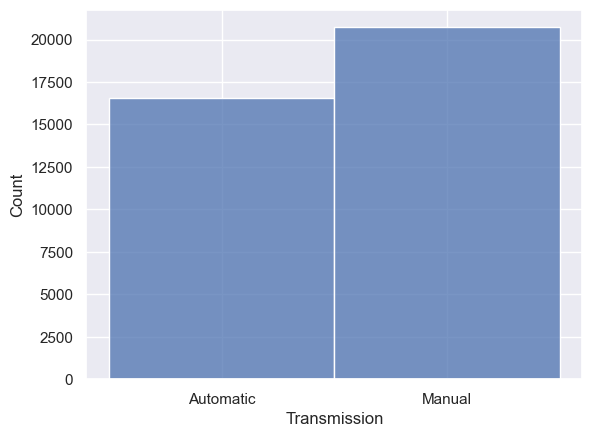

In [10]:
# Посмотрим как выглядит распределение целевой переменной.
target = "Transmission"
sns.histplot(
    df,
    x=target
)

classification_df=df.copy()

In [11]:
# Группировка по признакам и расчет количества значений целевой переменной
classification_df.groupby('Transmission').count()

,Make,Model,Age,Style,Distance,Engine_capacity(cm3),Fuel_type,Price(euro)
Transmission,,,,,,,,
Automatic,16541,16541,16541,16541,16541,16541,16541,16541
Manual,20723,20723,20723,20723,20723,20723,20723,20723


<Figure size 1000x1000 with 0 Axes>

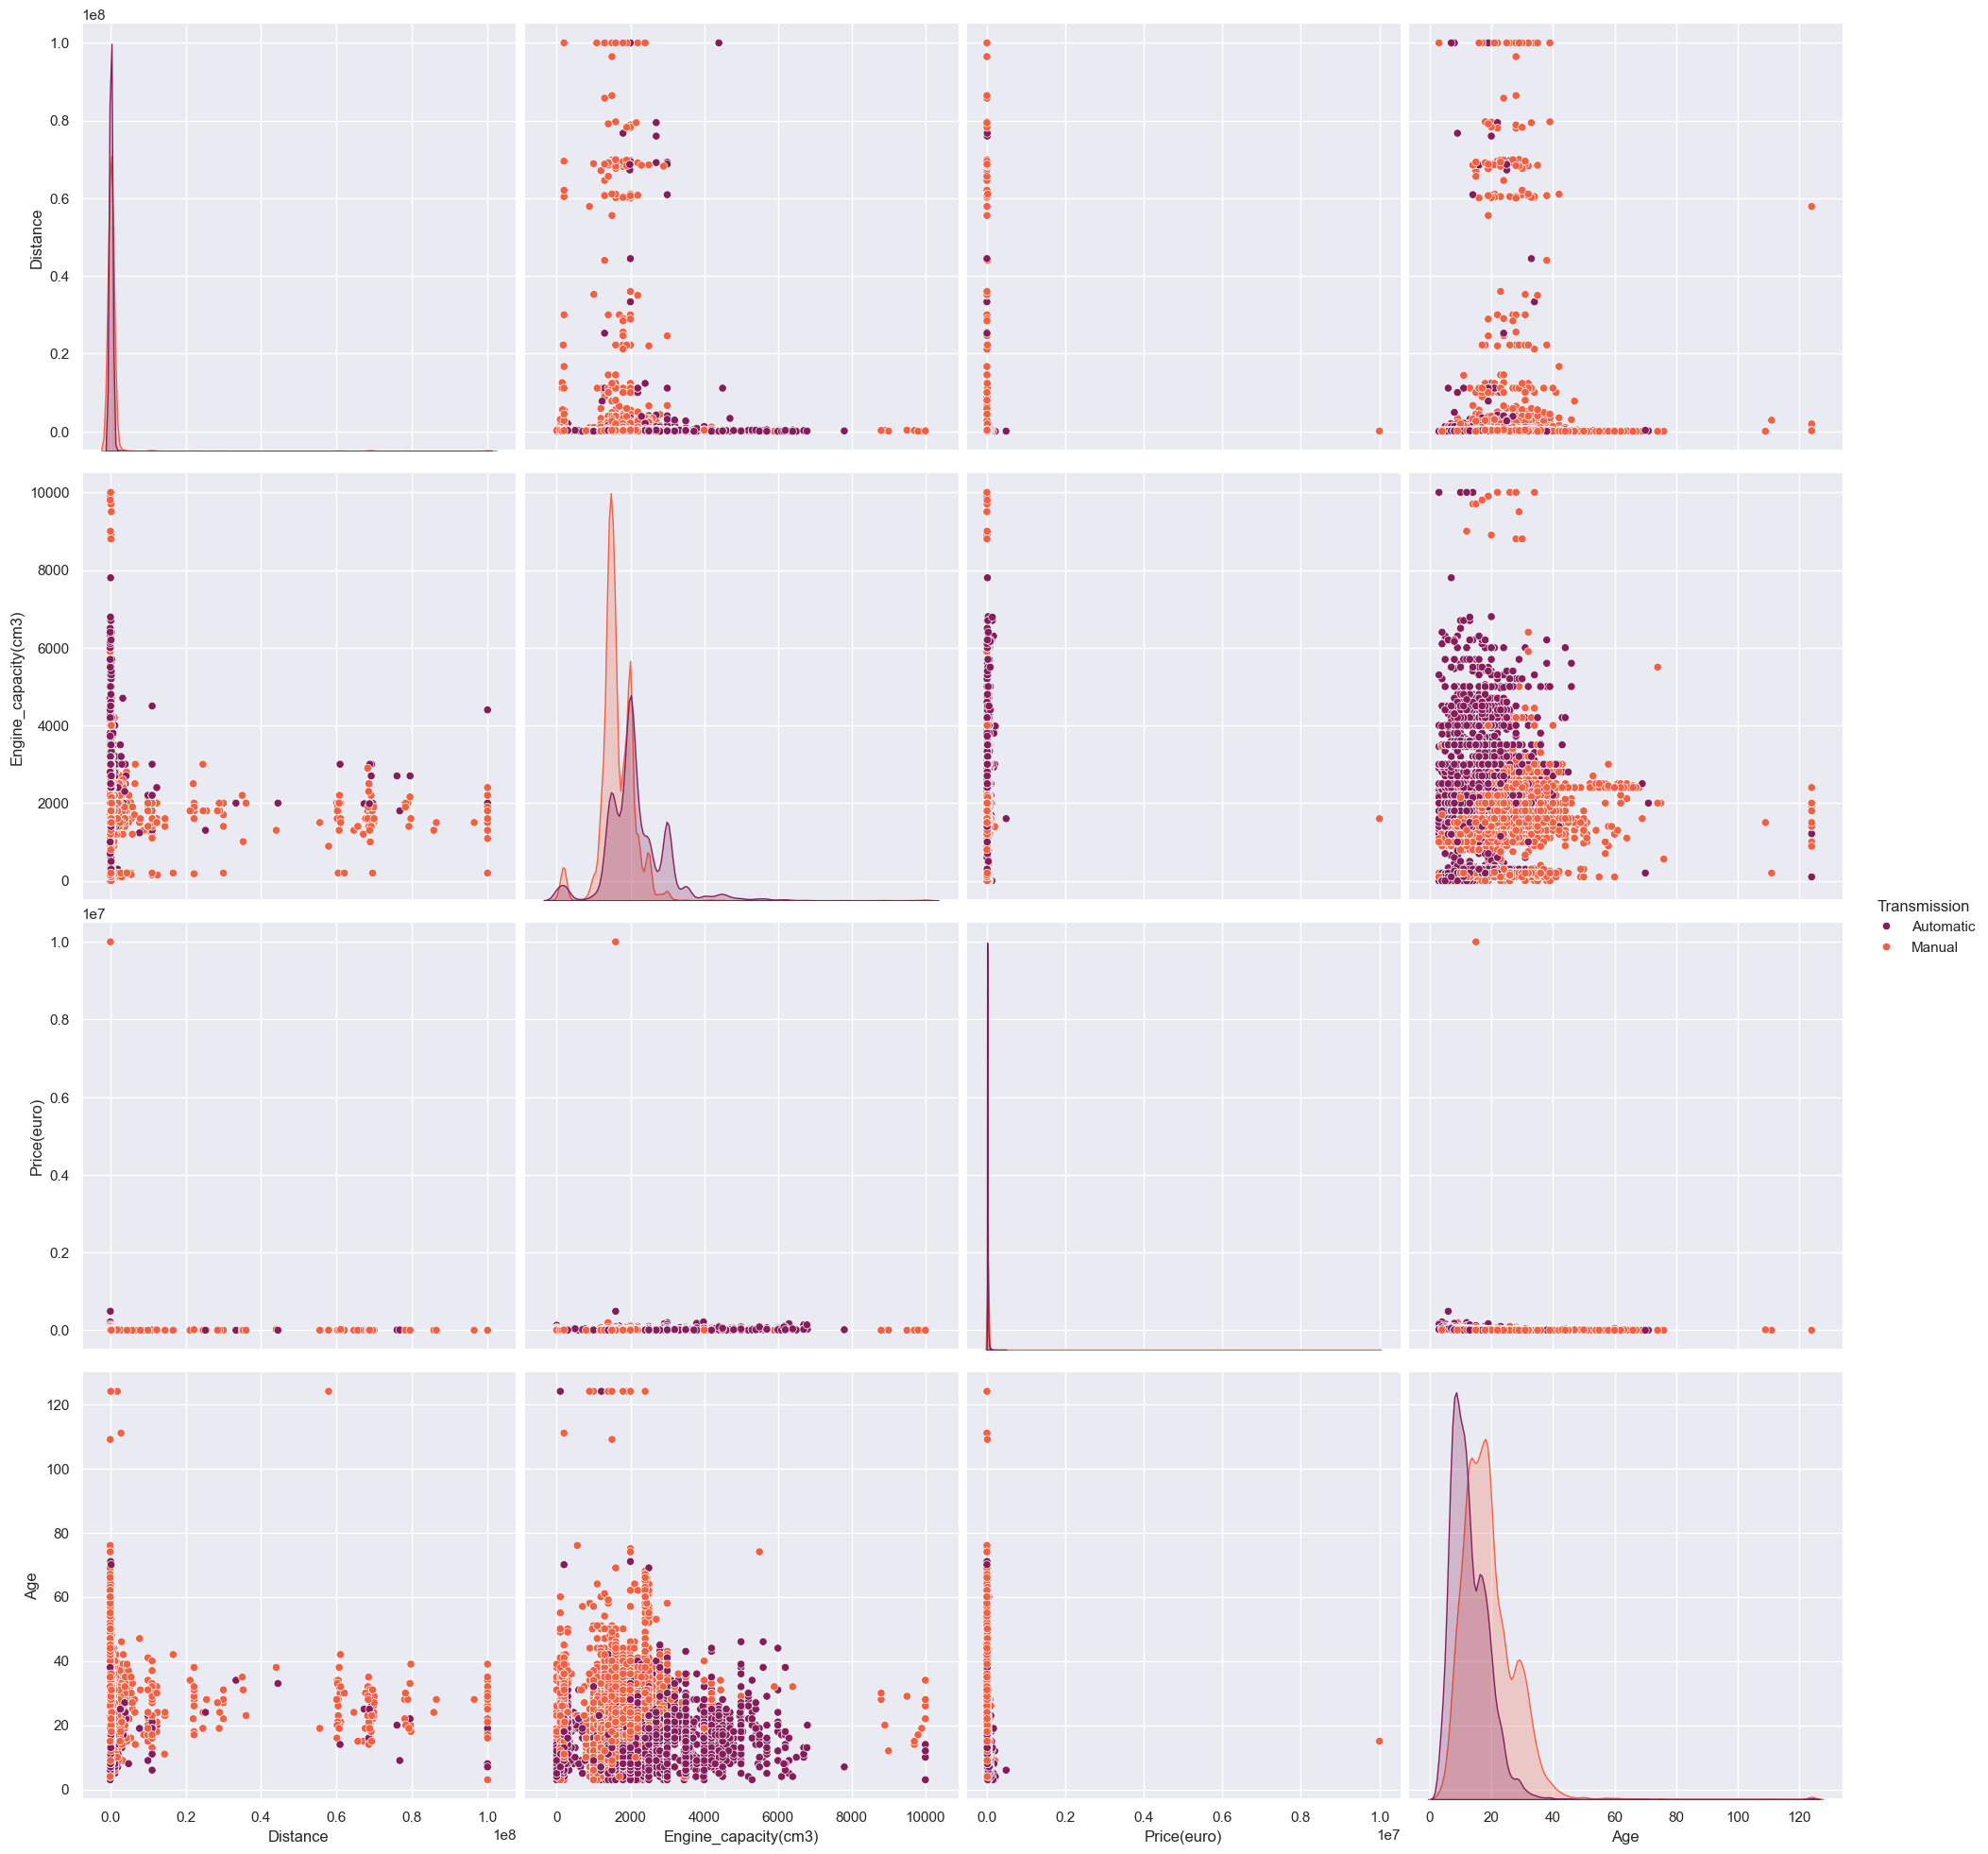

In [12]:
# визуализируем распределение целевой переменной по отношению к числовым признакам
fig = plt.figure(figsize=(10, 10))
sns.pairplot(data = classification_df[['Distance', 'Engine_capacity(cm3)',
                                       'Price(euro)', 'Age', 'Transmission']],
              hue ='Transmission',
              palette = 'rocket',
              height=5);

Целевая переменная "Manual" преобладает в признаках. Исключение "Price(Euro) - тут преобладает "Automatic".

# 3.Выполните адекватную предварительную обработку данных

Выполните адекватную предварительную обработку данных разными методами. Разные методы означают стандартизацию, нормализацию и степенное преобразование для числовых признаков и порядковое/one-hot кодирование для категориальных.



* Разделим датасет на признаки и целевые метки

Для задачи классификации выделим признак 'Transmission' в отдельный целевой датасет. Остальные признаки будут данными для тренировки модели.

In [13]:
data = df.drop(columns = ['Transmission']) # признаках не нужен 'Transmission' - удаляем
target = df['Transmission'] # поскольку это целевая метка

Сразу скорректируем список категориальных признаков

In [14]:
cat_columns.remove('Transmission') # уберем Целевую метку из списка категориальных данных


In [15]:
cat_columns

['Make', 'Model', 'Style', 'Fuel_type']

Приводим целевые метки к 0 и 1 (0 это 'Automatic', а 1 это 'Manual')



In [16]:
Label = prep.LabelEncoder()
Label.fit(target) # задаем столбец, который хотим преобразовать
Label.classes_ # в аттрибуте .classes_ хранится информация "какой класс как шифруется"
Label_encoded = Label.transform(target) # преобразуем и сохраняем в новую переменную
Label_encoded

array([0, 1, 1, ..., 1, 1, 1])

Разбиваем на тестовую и тренировочную выборку.

In [17]:
X_train, X_val, y_train, y_val = train_test_split(data,Label_encoded,
                                                  test_size = 0.2,
                                                  random_state = RANDOM_STATE)

* Выполним нормализацию и порядковое/one-hot кодирование.

* Создаем объект `Pipeline`

На вход ему подаем список из того, что мы хотим объединить в формате:
строка- название (даем имя Объекту)
сам объект (с заданными аргументами, если необходимо)

Сначала создадим отдельно Pipeline для числовых данных

In [18]:
# Pipeline предобработки числовых данных - нормализация
numerical_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),

    ('scaler', MinMaxScaler())

])

In [19]:
numerical_pipe

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', MinMaxScaler())])

Теперь для категориальных

In [20]:
categorical_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent', )),
    ('encoder', OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse_output=False))
])

In [21]:
categorical_pipe

Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                ('encoder',
                 OneHotEncoder(drop='if_binary', handle_unknown='ignore',
                               sparse_output=False))])

* Объединяем в единый Трансформер Колонок Данных

Объект `ColumnTransformer` имеет в целом схожий синтаксис с `Pipeline`

т.е. на вход ему также подаем список из того, что мы хотим объединить в формате:

* строка - название (даем имя Объекту)
* сам объект (в этом случае подаем объекты Pipeline)
* добавляется еще список названий столбцов, к которым мы применяем эти преобразования


In [22]:
preprocessors = ColumnTransformer(transformers=[ # передадим пайплайны для объединения в один процесс
    ('num', numerical_pipe, num_columns),
    ('cat', categorical_pipe, cat_columns)
])

In [23]:
preprocessors

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', MinMaxScaler())]),
                                 ['Age', 'Distance', 'Engine_capacity(cm3)',
                                  'Price(euro)']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Make', 'Model', 'Style', 'Fuel_type'])])

# 4.Разделите данные на тренировочную и валидационную выборку.

Разделите данные на тренировочную и валидационную выборку. Определитесь с метриками, по которым вы будете оценивать модель. Учитывайте дисперсию целевой переменной.

Данные на тренировочные и валидационные мы уже разбили. Определимся с метриками.

Создаем функции метрик для оценки модели.

In [24]:
def accuracy(model_pipe, X, y):
  y_model = model_pipe.predict(X)
  return accuracy_score(y, y_model)

def recall(model_pipe, X, y):
  y_model = model_pipe.predict(X)
  return recall_score(y, y_model)

Обучаем стандартно через `.fit()`

Тут важно, что на вход мы подаем датафреймы, т.к. в них есть колонки к которым мы обращаемся по именам. Внимательно следите за названиями колонок, он проверяет всё добуквенно

In [25]:
preprocessors.fit(X_train)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', MinMaxScaler())]),
                                 ['Age', 'Distance', 'Engine_capacity(cm3)',
                                  'Price(euro)']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Make', 'Model', 'Style', 'Fuel_type'])])

* Проверим, что трансформер колонок работает.

Чисто в тестовых и ознакомительных целях посмотрим на датасет после преобразования.

In [26]:
cat_ohe_names = preprocessors.transformers_[1][1]['encoder'].get_feature_names_out(cat_columns)
cat_ohe_names

array(['Make_ARO', 'Make_Abarth', 'Make_Acura', 'Make_Alfa Romeo',
       'Make_Alta marca', 'Make_Audi', 'Make_BAIC', 'Make_BMW',
       'Make_Bentley', 'Make_Brilliance', 'Make_Buick', 'Make_Byd',
       'Make_Cadillac', 'Make_Changan', 'Make_Chery', 'Make_Chevrolet',
       'Make_Chrysler', 'Make_Citroen', 'Make_Dacia', 'Make_Daewoo',
       'Make_Daihatsu', 'Make_Datsun', 'Make_Dodge', 'Make_Faw',
       'Make_Ferrari', 'Make_Fiat', 'Make_Ford', 'Make_GAZ', 'Make_GMC',
       'Make_Geely', 'Make_Great Wall', 'Make_Groz', 'Make_Haima',
       'Make_Haval', 'Make_Honda', 'Make_Hummer', 'Make_Hyundai',
       'Make_Infiniti', 'Make_Isuzu', 'Make_Jac', 'Make_Jaguar',
       'Make_Jeep', 'Make_KIA', 'Make_Lada', 'Make_Lamborghini',
       'Make_Lancia', 'Make_Land Rover', 'Make_Lexus', 'Make_Lifan',
       'Make_Lincoln', 'Make_LuAZ', 'Make_Maserati', 'Make_Mazda',
       'Make_McLaren', 'Make_Mercedes', 'Make_Mercedes-Maybach',
       'Make_Mini', 'Make_Mitsubishi', 'Make_Moskvich / Iz

Выполняем преобразование тренировочных данных.


In [27]:
train_data = preprocessors.transform(X_train) # преобразуем данные
columns = np.append(num_columns, cat_ohe_names) # объединяем названия колонок
pd.DataFrame(train_data, columns=columns,) #смотрим на датафрейм

,Age,Distance,Engine_capacity(cm3),Price(euro),Make_ARO,Make_Abarth,Make_Acura,Make_Alfa Romeo,Make_Alta marca,Make_Audi,...,Style_Roadster,Style_SUV,Style_Sedan,Style_Universal,Fuel_type_Diesel,Fuel_type_Electric,Fuel_type_Hybrid,Fuel_type_Metan/Propan,Fuel_type_Petrol,Fuel_type_Plug-in Hybrid
0,0.140496,0.001965,0.180018,0.00030,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.082645,0.002150,0.250025,0.00115,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.090909,0.001750,0.140014,0.00052,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.066116,0.001261,0.200020,0.00092,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.107438,0.001850,0.130013,0.00036,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29806,0.132231,0.001870,0.150015,0.00021,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
29807,0.247934,0.002993,0.159516,0.00013,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
29808,0.115702,0.002600,0.149715,0.00029,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
29809,0.132231,0.001091,0.138814,0.00043,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


Аналогично с валидационными.

In [28]:
val_data = preprocessors.transform(X_val)
pd.DataFrame(val_data, columns=columns,)

,Age,Distance,Engine_capacity(cm3),Price(euro),Make_ARO,Make_Abarth,Make_Acura,Make_Alfa Romeo,Make_Alta marca,Make_Audi,...,Style_Roadster,Style_SUV,Style_Sedan,Style_Universal,Fuel_type_Diesel,Fuel_type_Electric,Fuel_type_Hybrid,Fuel_type_Metan/Propan,Fuel_type_Petrol,Fuel_type_Plug-in Hybrid
0,0.107438,1.530000e-03,0.190019,0.000125,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.041322,1.000000e-08,0.140014,0.000880,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.049587,1.750000e-03,0.180018,0.000950,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.066116,6.924600e-04,0.120012,0.000590,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.239669,2.500000e-03,0.400040,0.000170,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7448,0.165289,2.850000e-03,0.190019,0.000135,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
7449,0.041322,1.870000e-03,0.220022,0.001000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
7450,0.165289,2.700000e-03,0.300030,0.000800,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7451,0.090909,3.100000e-03,0.200020,0.000530,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


Посмотрим размерности созданных выборок

In [29]:
# Посмотрим размерности созданных выборок
display(X_train.shape)
display(X_val.shape)
display(y_train.shape)
display(y_val.shape)

(29811, 8)

(7453, 8)

(29811,)

(7453,)

# 5.Выберите модель машинного обучения.

Выберите модель машинного обучения. Это должна быть модель логистической регрессии.

* Классификация Методом Логистической регрессии

In [30]:
pipe = Pipeline([
    ('preprocessors', preprocessors),
    ('model', LogisticRegression(C=0.001, random_state=42))
])

In [31]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessors',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Age', 'Distance',
                                                   'Engine_capacity(cm3)',
                                                   'Price(euro)']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Make', 'Model', 'Style',
                                                   'Fuel_type'])])),
                ('model', LogisticRegression(C=0.001, random_state=42))])

In [32]:
print(f"accuracy на тренировочной выборке: {accuracy(pipe, X_train, y_train):.4f}")
print(f"accuracy на валидационной выборке: {accuracy(pipe, X_val, y_val):.4f}")

accuracy на тренировочной выборке: 0.7709
accuracy на валидационной выборке: 0.7711


In [33]:
print(f"recall на тренировочной выборке: {recall(pipe, X_train, y_train):.4f}")
print(f"recall на валидационной выборке: {recall(pipe, X_val, y_val):.4f}")

recall на тренировочной выборке: 0.8693
recall на валидационной выборке: 0.8756


## Вывод

Исходя из этих данных, можно сделать вывод, что модель неплохо обучилась. Если добавить новые параметры, то точность на валидационной выборке будет лучше.